# Análise sobre casos de COVID-19 no Brasil

### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

## *1. Importando bibliotecas*

In [4]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

## *2. Declarando caminho do arquivo .csv utilizado*

In [37]:
filename = r'E:\Fatec\ADS\SEMESTRE 3\ESTRUTURAS DE DADOS\Analise de Dados\dados_saude.csv'
df = pd.read_csv(filename, delimiter=';',
                 encoding = 'ISO-8859-1',
                 error_bad_lines = False)

c:\users\black\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
df.shape

(393979, 134)

## *Colunas na tabela a ser utilizada*

In [39]:
for k in (0,3,7,11, 13, 22, 118, 121):
    print (k, df.columns[k])

0 DT_NOTIFIC
3 SEM_PRI
7 ID_MUNICIP
11 CS_SEXO
13 NU_IDADE_N
22 SG_UF
118 CLASSI_FIN
121 EVOLUCAO


## *Criação da tabela a ser utilizada*

In [40]:
df = df[['DT_NOTIFIC','SEM_PRI','ID_MUNICIP', 'CS_SEXO', 'NU_IDADE_N', 'SG_UF', 'CLASSI_FIN', 'EVOLUCAO']]

## *Atribuição de valores na coluna de tipo de doença e na coluna evolução*

In [41]:
troca_classificação = {1:'SRAG por influenza',
                       2: 'SRAG por outro vírus respiratório',
                       3: 'SRAG por outro agente Etiológico',
                       4: 'SRAG não especificado',
                       5: 'COVID-19'}

troca_evolução = {1:'Cura', 2:'Óbito', 9:'Ignorado'}

## *Alocação de valores dos dicionários dentro das colunas*

In [42]:
df.loc[(df.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 4
df['CLASSI_FIN'] = df['CLASSI_FIN'].apply(lambda x: troca_classificação[x])

df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x: troca_evolução[x])

## *Amostra da tabela (20 ocorrências)*

In [43]:
df.sample(20).sort_values('ID_MUNICIP')

,DT_NOTIFIC,SEM_PRI,ID_MUNICIP,CS_SEXO,NU_IDADE_N,SG_UF,CLASSI_FIN,EVOLUCAO
96839,02/05/2020,18,BAURU,F,18,SP,SRAG não especificado,Cura
309916,19/06/2020,25,CAMPINAS,F,48,SP,COVID-19,Cura
232605,23/05/2020,21,CUIABA,F,26,MT,COVID-19,Cura
216462,01/06/2020,22,FLORIANOPOLIS,F,75,SC,COVID-19,Óbito
129770,13/05/2020,18,FORTALEZA,F,86,CE,COVID-19,Óbito
391277,06/07/2020,20,FORTALEZA,M,75,CE,COVID-19,Cura
290585,14/06/2020,24,FORTALEZA,M,1,CE,COVID-19,Ignorado
347967,22/05/2020,21,JABOATAO DOS GUARARAPES,F,35,PE,SRAG não especificado,Ignorado
75103,23/04/2020,14,MANAUS,M,58,AM,SRAG não especificado,Óbito
228642,29/05/2020,21,MOSSORO,M,57,RN,SRAG não especificado,Ignorado


## *Quantidade de ocorrências de COVID-19 por municípios*

In [21]:
df.query('CLASSI_FIN == "COVID-19"').groupby('ID_MUNICIP').size().sort_values(ascending=False)

ID_MUNICIP
SAO PAULO          35884
RIO DE JANEIRO     16647
FORTALEZA           8663
RECIFE              7447
MANAUS              4730
                   ...  
MUCUM                  1
SIMAO DIAS             1
CHOPINZINHO            1
MORRO DA FUMACA        1
LAGOA GRANDE           1
Length: 1792, dtype: int64

## *Gráfico das 10 cidades com maior ocorrência de COVID-19*

Text(0.5, 1.0, 'Dez cidades com mais casos de COVID-19')

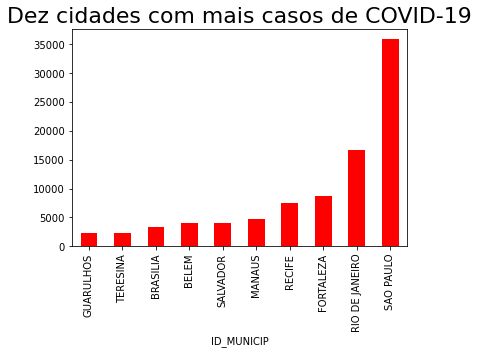

In [22]:
df.query('CLASSI_FIN == "COVID-19"').groupby('ID_MUNICIP').size().sort_values().tail(10).plot(kind='bar', color='red').set_title('Dez cidades com mais casos de COVID-19', fontsize=22)

## *Lista com o total de casos de COVID-19 por estado*

In [49]:
df.query('CLASSI_FIN == "COVID-19"').groupby('SG_UF').size().sort_values(ascending=False)

SG_UF
SP    65122
RJ    24965
CE    12464
PA    10316
PE    10093
AM     7394
MT     7188
BA     5778
MG     5475
RS     4324
PR     3566
DF     3136
MA     2829
PI     2522
PB     2448
AL     2197
GO     2164
RN     2113
ES     1998
SC     1866
SE     1371
MS      858
RO      760
TO      669
RR      358
AC      357
AP      349
dtype: int64

## *Grafico dos 10 estados com maior casos de COVID-19*

Text(0.5, 1.0, 'Dez estados com mais casos de COVID-19')

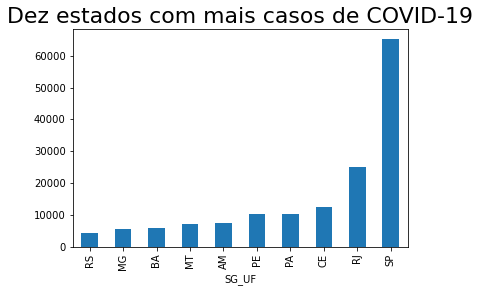

In [24]:
df.query('CLASSI_FIN == "COVID-19"').groupby('SG_UF').size().sort_values().tail(10).plot(kind='bar').set_title('Dez estados com mais casos de COVID-19', fontsize=22)

## *Gráfico com a Quantidade de óbitos de COVID-19 por Estados*

Text(0.5, 1.0, 'Óbito de COVID-19 por Estado')

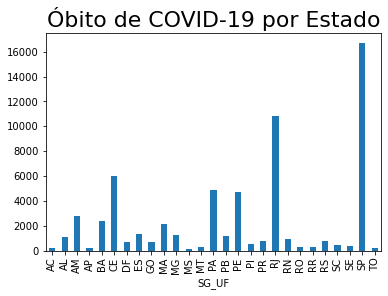

In [26]:
df.query('EVOLUCAO == "Óbito" and CLASSI_FIN == "COVID-19"').groupby('SG_UF').size().plot(kind='bar').set_title('Óbito de COVID-19 por Estado', fontsize = 22)

## *Quantidade de casos de COVID-19*

In [36]:
df.query('CLASSI_FIN == "COVID-19"').groupby('EVOLUCAO').size().sort_values(ascending=False)

EVOLUCAO
Cura        77747
Óbito       61830
Ignorado    43125
dtype: int64

## *Evolução de casos de COVID-19*

Text(0.5, 1.0, 'Evolução')

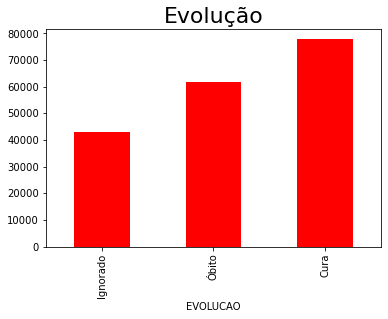

In [47]:
df.query('CLASSI_FIN == "COVID-19"').groupby('EVOLUCAO').size().sort_values().tail(10).plot(kind='bar', color='red').set_title('Evolução', fontsize=22)

In [50]:
df.query('CLASSI_FIN == "COVID-19"').groupby('DT_NOTIFIC').size().sort_values(ascending=False)

DT_NOTIFIC
18/05/2020    3245
15/06/2020    3164
25/05/2020    3042
11/05/2020    3040
04/05/2020    2901
              ... 
29/02/2020       1
03/03/2020       1
28/02/2020       1
24/02/2020       1
01/03/2020       1
Length: 132, dtype: int64